# Part 3.2: Unsupervised Learning - Hierarchical Clustering

Hierarchical Clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. There are two main strategies:

- **Agglomerative (Bottom-up)**: Each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
- **Divisive (Top-down)**: All observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

We will focus on the more common agglomerative approach.

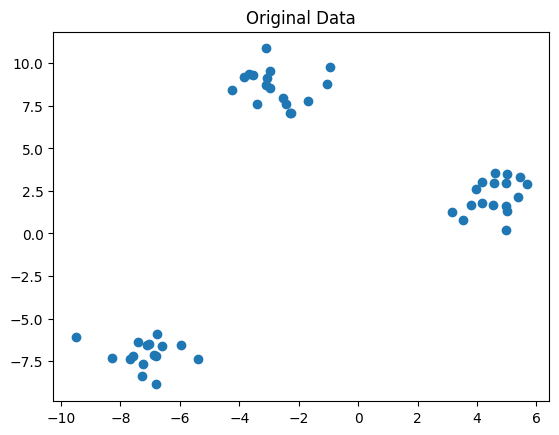

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as shc

# Generate synthetic data
X, y = make_blobs(n_samples=50, centers=3, cluster_std=1.0, random_state=42)
plt.scatter(X[:,0], X[:,1])
plt.title('Original Data')
plt.show()

### The Dendrogram
A key tool in hierarchical clustering is the **dendrogram**, which illustrates the arrangement of the clusters produced. We can use the dendrogram to visually decide on the optimal number of clusters.

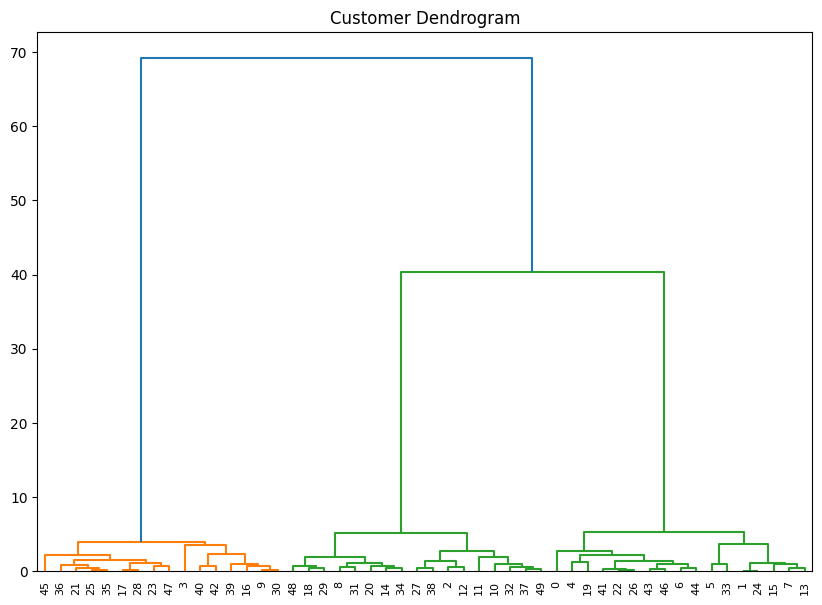

By looking for the longest vertical line that doesn't cross any extended horizontal lines, we can see that k=3 seems like a good choice.


In [2]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendrogram")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.show()

print("By looking for the longest vertical line that doesn't cross any extended horizontal lines, we can see that k=3 seems like a good choice.")

### Training the Model
Now that we've chosen the number of clusters from the dendrogram, we can train the `AgglomerativeClustering` model.

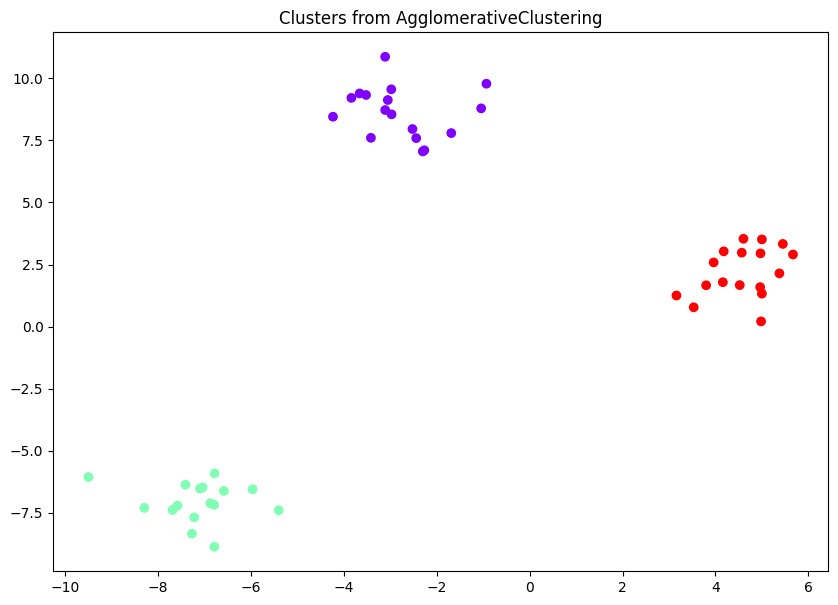

In [5]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = cluster.fit_predict(X)

plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
plt.title('Clusters from AgglomerativeClustering')
plt.show()